In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('airline.csv')

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.shape

(103904, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online booking             103904 non-null  int64  
 11  Gate_location                      1039

In [8]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_

In [9]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction    

In [10]:
df=df.dropna(how ='any')

In [11]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [12]:
df= df.drop(['Unnamed: 0', 'id'], axis = 1)

In [13]:
df.duplicated().sum()

0

In [14]:
df.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [15]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [16]:
df['Type_of_Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [17]:
df['Customer_Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [18]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## EDA

In [19]:
df.satisfaction.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

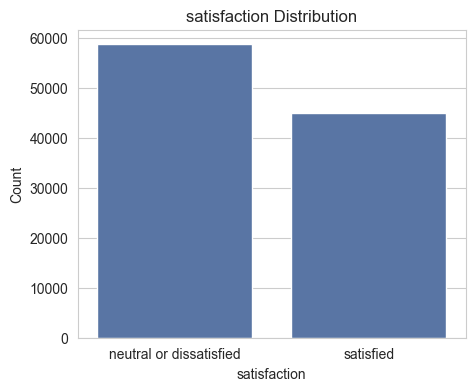

In [20]:
value_counts = df['satisfaction'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(5, 4))
sns.set_style("whitegrid")
sns.color_palette("deep")
sns.set_palette("deep")
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title("satisfaction Distribution")
plt.xlabel("satisfaction")
plt.ylabel("Count")
plt.show()

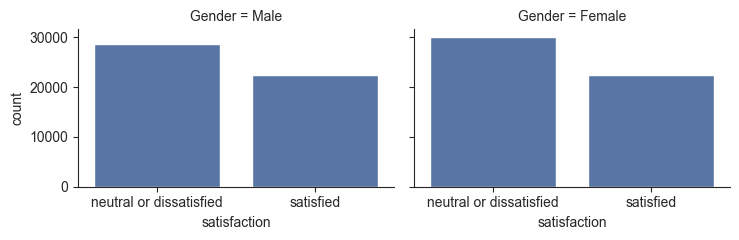

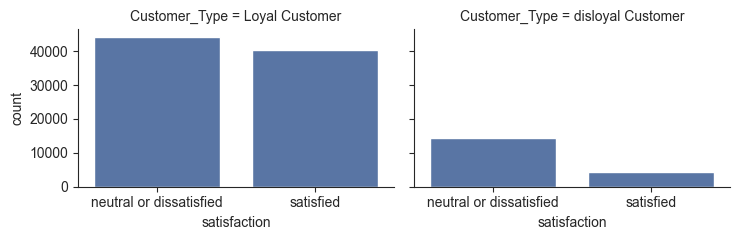

In [21]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Gender", data=df, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot(x="satisfaction", col="Customer_Type", data=df, kind="count", height=2.5, aspect=1.5)

plt.show()


Gender:
It is observed that gender distribution of neutral/dissatisfied and satisfied customers are similar. For both male and female passengers, number of neutral/dissatisfied customers are on the higher when compared to number of satisfied customers.

Customer Type:
Even among loyal passengers which are high in number, the ratio of satisfied and neutral/dissatisfied ones are almost close to 49:51.

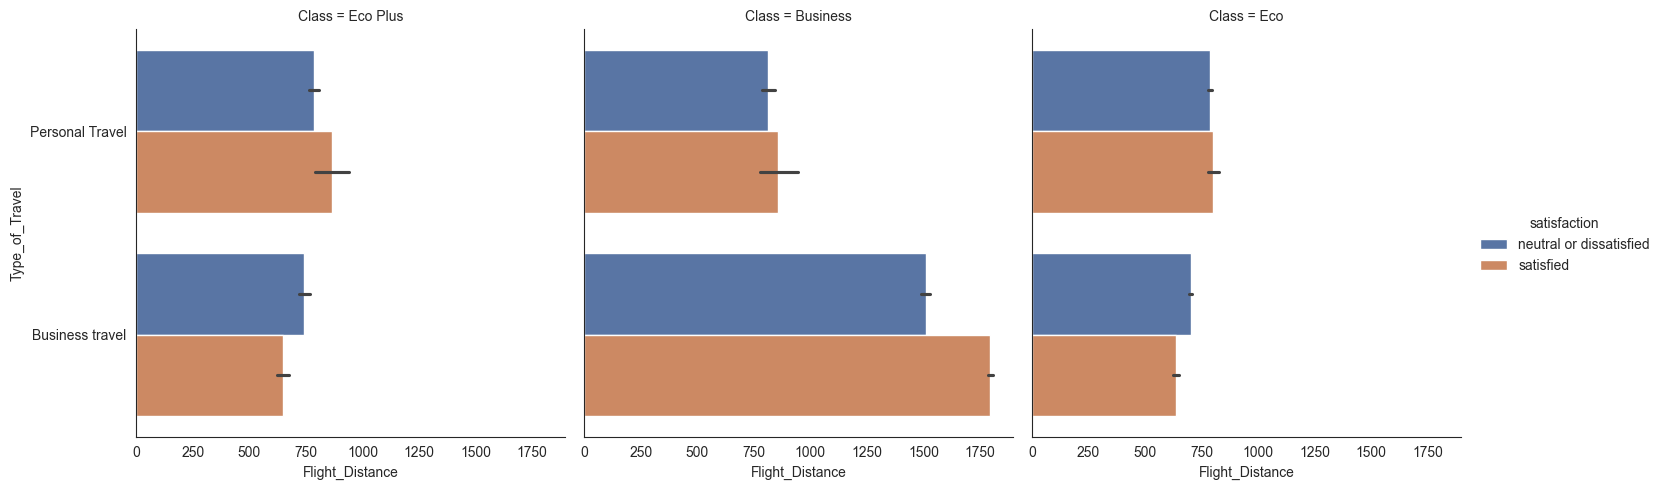

In [22]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=df, kind="bar")

Type of Travel and Flight Distance grouped by Class:
- For business travel in business class category, the number of satisfied passengers are quite on the higher for longer flight distance. For other combinations, almost equal distribution of satisfied and neutral/dissatisfied passengers is present.

### Data preprocessing

In [23]:
df.dtypes

Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
satisfacti


The following features: Gender, Customer Type, Type of Travel, and Class are all currently categorical data (dtype: "object"). However, we need to convert it to numerical data in order for our Machine Learning model(s) to be able understand the data. Therefore, we'll do just that using the get_dummies function from pandas.

In [24]:
df_num = df.select_dtypes(include='number')

In [25]:
df_num.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [26]:
df_num.corr()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147
Flight_Distance,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426
Inflight_wifi_service,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095
Departure/Arrival_time_convenient,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864
Ease_of_Online booking,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984
Gate_location,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143
Food_and_drink,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524
Online_boarding,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949
Seat_comfort,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.027323,-0.029900
Inflight_entertainment,0.076380,0.128645,0.209513,-0.004683,0.047185,0.003564,0.622374,0.285194,0.610614,1.000000,0.420352,0.299850,0.378361,0.120812,0.405247,0.691735,-0.027691,-0.030703


<Axes: xlabel='Arrival_Delay_in_Minutes'>

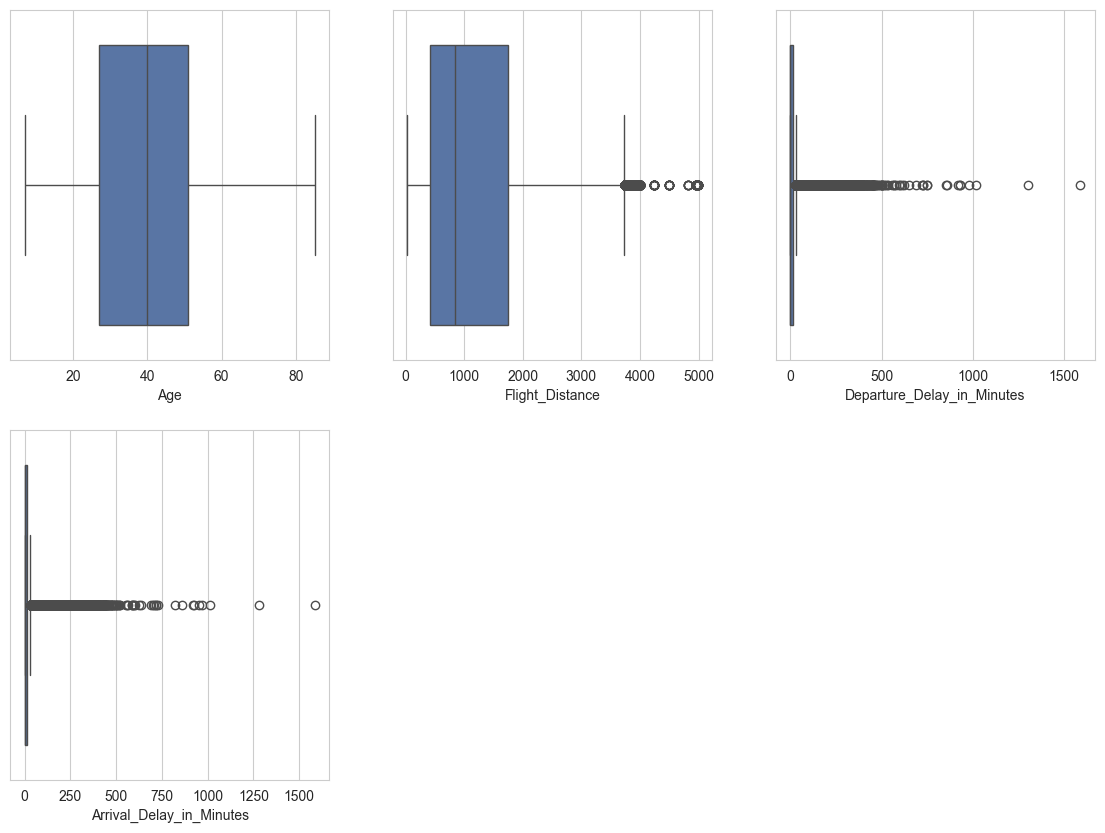

In [27]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Age',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Flight_Distance',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Departure_Delay_in_Minutes',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='Arrival_Delay_in_Minutes',data=df)

In [28]:
df_num.shape

(103594, 18)

In [29]:
# outlier filter

# get thresholds for outlier
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [30]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

<Axes: xlabel='Arrival_Delay_in_Minutes'>

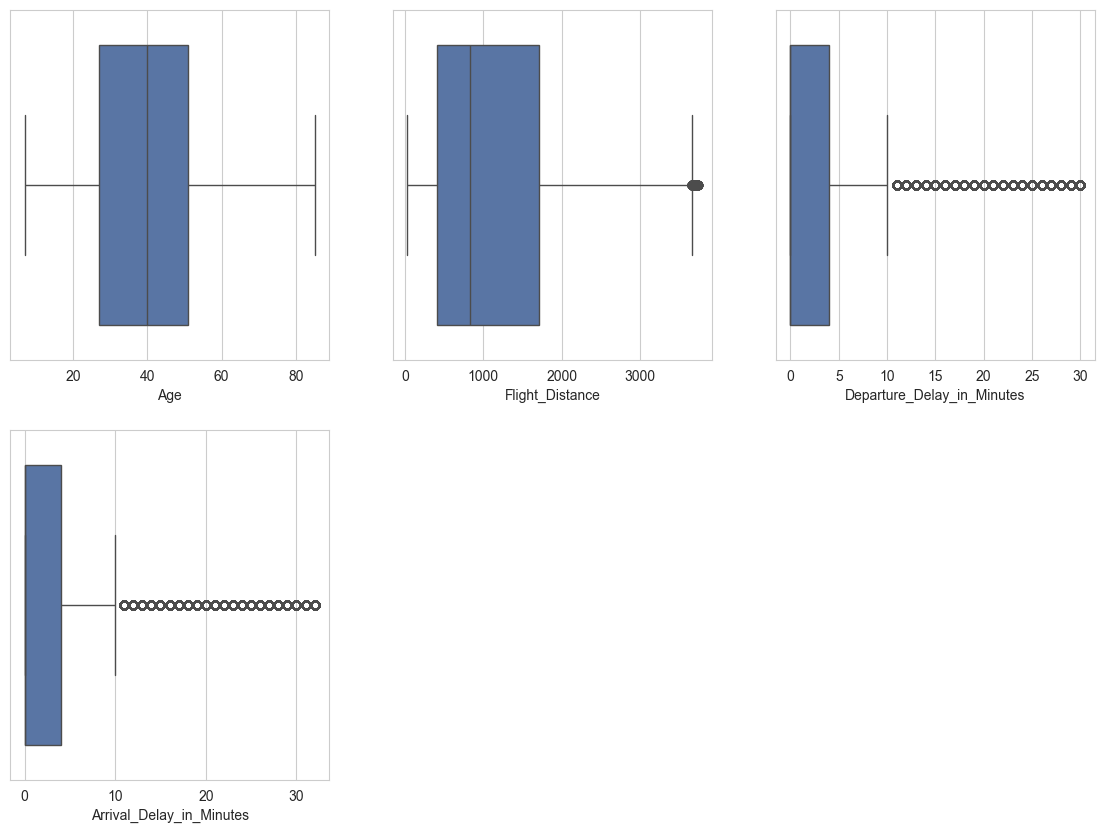

In [31]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Age',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Flight_Distance',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Departure_Delay_in_Minutes',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='Arrival_Delay_in_Minutes',data=df)

In [32]:
df.shape

(74743, 23)

# Data Preprcessing

In [33]:
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [34]:
X = df.drop(columns='satisfaction',axis=1)
y=df.satisfaction

In [35]:
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

In [36]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [37]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)
X_num_scaled.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0.076923,0.115789,0.6,0.8,0.6,0.2,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250
2,0.243590,0.299865,0.4,0.4,0.4,0.4,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000
4,0.692308,0.049393,0.6,0.6,0.6,0.6,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000
5,0.243590,0.310121,0.6,0.8,0.4,0.2,0.2,0.4,0.00,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000
6,0.512821,0.336032,0.4,0.8,0.4,0.6,0.4,0.4,0.25,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875


In [38]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)
X_cat_encoded.head()

,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,1,0,0,1,0,0,1
2,1,0,1,0,1,0,1,0,0
4,0,1,1,0,1,0,1,0,0
5,1,0,1,0,0,1,0,1,0
6,0,1,1,0,0,1,0,1,0


In [39]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(52320, 27) (22423, 27) (52320,) (22423,)


## Model Evaluation 

#### Decision Tree

In [62]:
dt = DecisionTreeClassifier()

criterion=['entropy']
max_depth=[3]
random_state=[0]

parameters= dict(criterion=criterion,max_depth=max_depth,random_state=random_state)

gridsearchDT = GridSearchCV(dt, parameters, cv = 5)
gridsearchDT.fit(X_train, y_train)

gridsearchDT.best_params_
predictions =gridsearchDT.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     11978
           1       0.87      0.91      0.89     10445

    accuracy                           0.89     22423
   macro avg       0.89      0.90      0.89     22423
weighted avg       0.90      0.89      0.90     22423





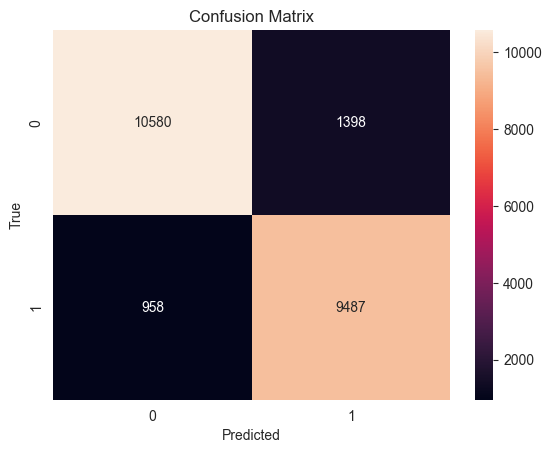

In [63]:
#Report
decision_tree_report = classification_report(y_test, predictions)
print(decision_tree_report)
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

In [64]:
accuracy_score(y_test, predictions)

0.8949293136511618

In [65]:
# to show the best parameter
gridsearchDT.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'random_state': 0}

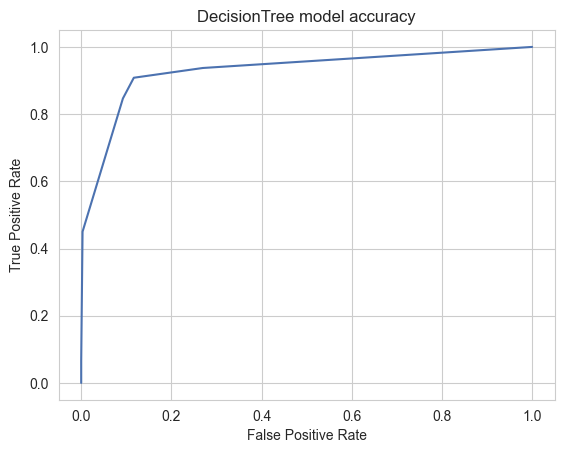

In [66]:
from sklearn import metrics
predictions = gridsearchDT.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.title('DecisionTree model accuracy')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
# Compute AUC
auc = roc_auc_score(y_test, predictions)

# Print  AUC
print('AUC:', auc)

AUC: 0.9286236151310113


In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid
parameters = {
    'max_depth': [3],  # Adjust as needed
    'learning_rate': [0.1],  # Adjust as needed
    'n_estimators': [100],  # Adjust as needed
    'subsample': [0.8],  # Adjust as needed
    'colsample_bytree': [0.8],  # Adjust as needed
    'random_state': [0]
}

# Perform grid search
grid_search_xgb = GridSearchCV(xgb_model, parameters, cv=5)
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters:", best_params_xgb)

# Make predictions on the test set
predictions_xgb = grid_search_xgb.predict(X_test)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.8}


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11978
           1       0.95      0.93      0.94     10445

    accuracy                           0.94     22423
   macro avg       0.94      0.94      0.94     22423
weighted avg       0.94      0.94      0.94     22423





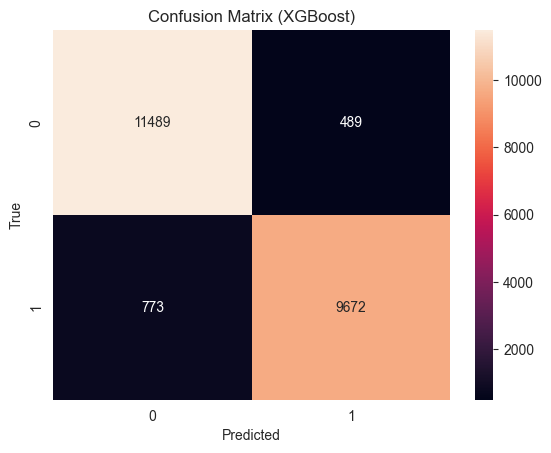

In [44]:
# Report
xgb_report = classification_report(y_test, predictions_xgb)
print(xgb_report)
print('\n')

# Confusion Matrix Visualization
matrix_xgb = confusion_matrix(y_test, predictions_xgb)
sns.heatmap(matrix_xgb, annot=True, fmt="d")
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
grid_search_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'random_state': 0,
 'subsample': 0.8}

In [48]:
xgb_model = XGBClassifier(**best_params_xgb) 

In [49]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [50]:
predictions_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

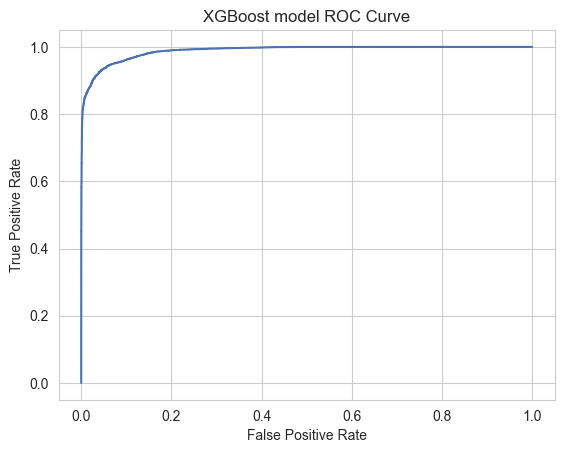

In [52]:
from sklearn import metrics
# Compute ROC curve
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, predictions_proba_xgb)

# Create ROC curve
plt.plot(fpr_xgb, tpr_xgb)
plt.title('XGBoost model ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
# Compute AUC
auc_xgb = roc_auc_score(y_test, predictions_xgb)

# Print  AUC
print('AUC:', auc_xgb)

AUC: 0.9425842263393213


#### Random Forest

In [164]:
rf = RandomForestClassifier()


n_estimators= [100,200]
max_depth= [4,6,8]

parameters=dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth )

gridsearchRF = GridSearchCV(rf, parameters, cv = 5)
gridsearchRF.fit(X_train, y_train)

gridsearchRF.best_params_
predictions =gridsearchRF.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11978
           1       0.95      0.93      0.94     10445

    accuracy                           0.94     22423
   macro avg       0.94      0.94      0.94     22423
weighted avg       0.94      0.94      0.94     22423





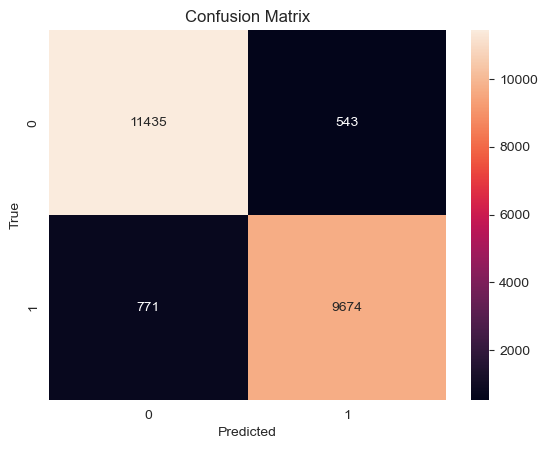

In [165]:
#Report
random_forest_report = classification_report(y_test, predictions)
print(random_forest_report)
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

In [166]:
accuracy_score(y_test, predictions)

0.9413994559158008

In [167]:
# to show the best parameter
gridsearchRF.best_params_

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}

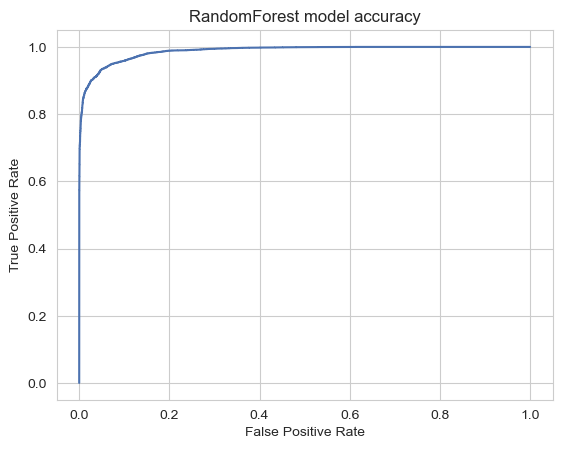

In [168]:
predictions = gridsearchRF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.title('RandomForest model accuracy')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [169]:
# Compute AUC
auc = roc_auc_score(y_test, predictions)

# Print  AUC
print('AUC:', auc)

AUC: 0.9875605396234247
